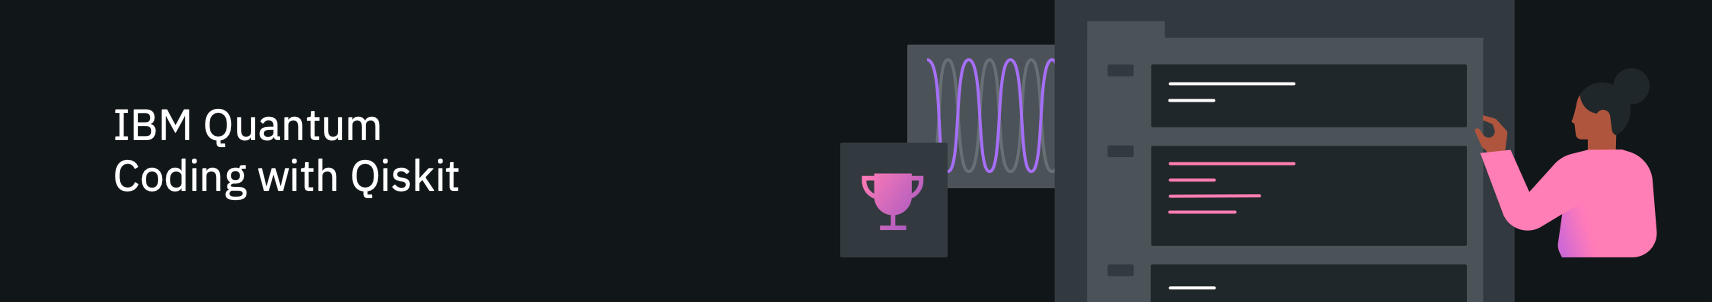

# Table of Contents
- [Introduction](#intro)
- [Part 0: Let's Set-Up our Environment and Install Qiskit](#setup)
- [Part I: Let's Learn the Qiskit Workflow](#part1)
  - [Step 1: Map circuits and operators](#step-1)    
  - [Step 2: Optimize the circuit ](#step-2)
  - [Step 3: Execute the circuit ](#step-3)
  - [Step 4: Post-process the results](#step-4)
- [Part 2: Qiskit's new Capabilities](#part2)
  - [Qiskit states, the new and the old](#pt1)
  - [VQE with Qiskit 1.0](#pt2)


# Quantum Computing with Qiskit - Introduction to Qiskit Pattern & Beyond <a name="intro"></a>


## Introduction

Welcome! In this lab we follow along with the [third episode of Coding with Qiskit 1.x](https://www.youtube.com/watch?v=93-zLTppFZw&list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&index=3). We've added a few coding challenges to make sure you're grasping the basics.
Our first goal in this lab is to generate a two-qubit Bell state using the approach provided by Qiskit patterns.

A Qiskit pattern is a four step workflow for setting up, running, and getting results from a quantum computer. This is the workflow designed to help you use utility-scale quantum computers. It works as follows:

1. Map circuits and operators
2. Optimize the circuit
3. Execute the circuit
4. Post-process the results

Moreover, the second part of this lab is fully optional and is designed to introduce you to some of the new capabilities and functions of Qiskit 1.0. Through this lab you will learn how to set up quantum states using Qiskit, and how to implement an optimization algorithm using VQE. These two tasks will be set in two final (optional) sections:

1. Qiskit states, the new and the old
2. VQE with Qiskit 1.0

Let's get started!



## Part 0. Let's Set-Up our Environment and Install Qiskit <a name="setup"></a>


In [ ]:
### Install Qiskit

!pip install qiskit[visualization]==1.0.2
!pip install qiskit_aer
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc
!pip install prototype-zne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 3.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=19b24797c45f4a5436fa54fb1c24364fa22fa00fcac375b758830858eafba9bc
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# import of required libraries and modules

import numpy as np
from typing import List, Callable
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, PrimitiveJob
from qiskit.circuit.library import TwoLocal
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_aer import AerSimulator

In [ ]:
%set_env QXToken=#Your_Quantum_API_Token_goes_here
# Make sure there is no space between the equal sign and the beginning of your token

## Part 1. Let's Learn the Qiskit Workflow<a name="part1"></a>

##  Step 1: Map circuits and operators <a name="step-1"></a>



Mapping your problem to circuits and operators is fairly easy when you're only dealing with a handful of qubits, but can get more difficult as you scale up. To start, we will construct a Bell state. This is a classic (*or should I say, "quantum"*) example that showcases entanglement between two qubits.

First we apply a Hadamard gate to qubit 0, placing it in a superposition. Then we apply a CNOT gate between qubits 0 and 1. The CNOT effectively entangles our qubits, meaning that when we measure the output of this circuit we should expect to see that both qubits share a measurement result.

If that made sense to you, nice job, you're ready to go. However, if that went over your head, the Challenge will be quite difficult for you. Instead, you may want to take this time to review the course on [Quantum Information and Computation](https://learning.quantum.ibm.com/course/basics-of-quantum-information/quantum-circuits).

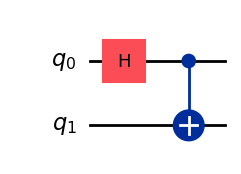

In [ ]:
# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a CNOT gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw("mpl")

We also want to be able to visualize that our circuit does what we expect it to do. To accomplish this, let's set up some **operators**.

Here we create some operators for our two qubits. Some (like `XX`)  measure both qubits, while others (like `XI`) only measure one. Later we will check their expectation values to make sure our circuit is working properly. Because we've created an entangled Bell state, we should expect that our operators only measuring one qubit have an expectation value of 0. Similarly, we should expect the operators which measure both qubits to come back with some non-zero (hopefully close to 1) expectation value.

How do we do this? We simply use a combination of `X`, `Z`, and Identity (`I`) operators.

* Applying an `I` gate to a qubit is the same as doing nothing to a qubit. We can use a combination of `X`/`Z` and `I` to make the operators of `XI`, `IX`, `ZI`, and `IZ`.
* We only have two operators which measure both qubits: `XX` and `ZZ`. We use a combination of `X` or `Z` gates to make each one, respectfully.

Later on in this lab, you will graph the expectation values for each of these operators to visualize your circuit.


### Exercise 1 <a name="ex-1"></a>
<div class="alert alert-block alert-success">

Hey, look at us. Who would have thought — we made it to our first Challenge exercise!

In this first exercise, you should complete the list of operators. We have provided three for you already: the `ZZ`, `ZI`, and `IX` observables. We've also written comments in the code explaining what each observable is looking for.

**Following the same approach, your task is to create the last three operators:** `IZ`, `XX`, and `XI`

</div>

In [ ]:
# The ZZ applies a Z operator on qubit 0, and a Z operator on qubit 1
ZZ = SparsePauliOp('ZZ')

# The ZI applies a Z operator on qubit 0, and an Identity operator on qubit 1
ZI = SparsePauliOp('ZI')

# The IX applies an Identity operator on qubit 0, and an X operator on qubit 1
IX = SparsePauliOp('IX')



### Write your code below here ###
### Follow the same naming convention we used above


### SOLUTION
IZ = SparsePauliOp('IZ')
XX = SparsePauliOp('XX')
XI = SparsePauliOp('XI')



## Don't change any code past this line, but remember to run the cell.

observables = [IZ, IX, ZI, XI, ZZ, XX]

## Step 2: Optimize the circuit <a name="step-2"></a>

A Qiskit pattern is the best framework for working with a quantum computer at *utility scale* — the point where quantum computers can perform reliable computations at a scale beyond brute force classical computing methods. These computations can use hundreds of qubits. However, in this intro section, we're only using two qubits. So, that means we do not need to do any work here to optimize the circuit.

To optimize the circuit, we can use the Qiskit transpiler. During transpilation, we can optimally layout our qubits to minimize the required number of gates, for example. You’ll learn more about this process in later labs. For now, you can move on to the next step of the pattern.

## Step 3: Execute the circuit <a name="step-3"></a>

Time to run the circuit.

In this next cell, you might notice something new. We are going to run the circuit using Qiskit Runtime.

The next lab of the IBM Quantum Challenge covers Qiskit Runtime and the primitives in much greater detail. We won't talk about it too much in this lab other than to say that Qiskit Runtime gives us the easiest means of running our circuit.

Here we run our circuit using the Estimator, then save the results as the variable `job`. You may now proceed to the next and final step of Qiskit patterns, where we will visualize this information.

In [ ]:
# Set up the Estimator
estimator = Estimator(backend=AerSimulator())

# Submit the circuit to Estimator
pub = (qc, observables)

job = estimator.run(pubs=[pub])

<ipython-input-8-da63808d3ed1>:2: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  estimator = Estimator(backend=AerSimulator())


## Step 4: Post-process the results <a name="step-4"></a>


The last step of Qiskit patterns is where we process, analyze, and visualize the results of our job.

There are many ways you can choose to do this. We showcase a number of different options throughout the IBM Quantum Challenge. It's always a great day to learn something new!

Here we are going to collect our data and plot it on a graph we construct.

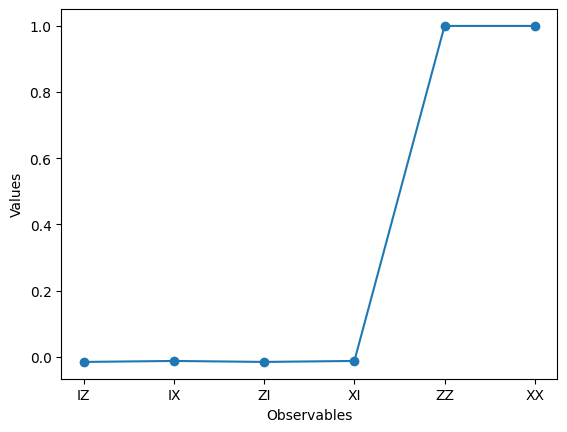

In [ ]:
# Collect the data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result()[0].data.evs

# Set up our graph
container = plt.plot(data, values, '-o')

# Label each axis
plt.xlabel('Observables')
plt.ylabel('Values')

# Draw the final graph
plt.show()

You *should* see the operators which measure both qubits (`ZZ` and `XX`) have a value that's close to 1, and the other operators have a value that's close to 0. This shows that your circuit is entangled. Great work.

The plot displays as a line graph, but you can also visualize this as a bar graph.

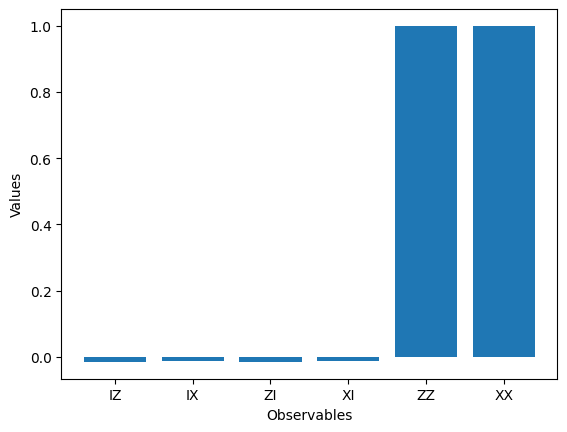

In [ ]:
container = plt.bar(data, values, width=0.8)

plt.xlabel('Observables')
plt.ylabel('Values')

plt.show()

Congrats! You learned how to follow the workflow of Qiskit patterns to set up, optimize, run, and process your circuit. You successfully created a two-qubit Bell state, and showed that it was properly entangled by visualizing the operators. You learned how to use the auto-grader as well. Rock on!

With the basics down, you’re now ready to begin thinking like a quantum developer. It’s a little different than thinking like a quantum physicist, though. We’re not just making discoveries about how the world works—we’re trying to use quantum mechanics as a tool to solve meaningful problems and enact positive change in the world. This is the era of Quantum Utility! :)

 ## Part 2: New capabilities and functions of Qiskit 1.0  <a name="part2"></a>

## 1. Qiskit states, the new and the old  <a name="pt1"></a>

Let's get started!

<a id="exercise1"></a>
<a name="exercise1"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 1: Create and draw a singlet Bell state circuit</b>
    
Bell circuits are specific circuits which generate Bell states, or EPR pairs, a form of entangled and normalized basis vectors. In other words, they are the circuits we use to generate entangled states, a key ingredient in quantum computations.

There exist 4 different Bell states. You can learn about each from the [Basics of Quantum Information page](https://learning.quantum.ibm.com/course/basics-of-quantum-information/multiple-systems#bell-states)

**Your Task:** please build a circuit that generates the $| \psi ^- \rangle$ Bell state.
    
</div>

<div class="alert alert-block alert-warning">

**Hint:** The $| \psi ^- \rangle$ Bell state uses a single Z gate, and a single X gate, both of which occur after the CNOT.

</div>

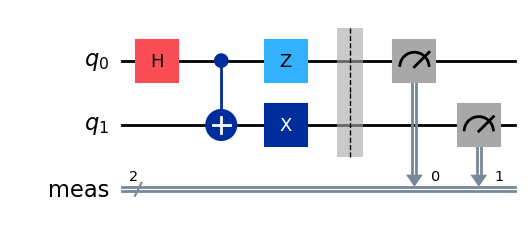

In [ ]:
# Build a circuit to form a psi-minus Bell state
# Apply gates to the provided QuantumCircuit, qc

qc = QuantumCircuit(2)

### Write your code below here ###
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)
qc.z(0)
qc.x(1)

### Don't change any code past this line ###
qc.measure_all()
qc.draw('mpl')

To observe the resulting entangled state that this circuit produces, we'll run our circuit a number of times and collect statistics on the final qubit measurements. That is the goal of the next exercise.

<a id="exercise2"></a>
<a name="exercise2"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 2: Use Sampler.run</b>
    
The [Qiskit Sampler](https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.StatevectorSampler) primitive ([more info on Primitives here](https://docs.quantum.ibm.com/run/primitives-get-started)) returns the sampled result according to the specified output type. It allows us to efficiently sample quantum states by executing quantum circuits and providing probability distributions of the quantum states.

**Your Task:** use the Qiskit StatevectorSampler to obtain the counts resulting from our circuit.
    
</div>

In [ ]:
qc.measure_all()

### Write your code below here ###


sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=10000)


### Don't change any code past this line ###

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'10': 4905, '01': 5095}


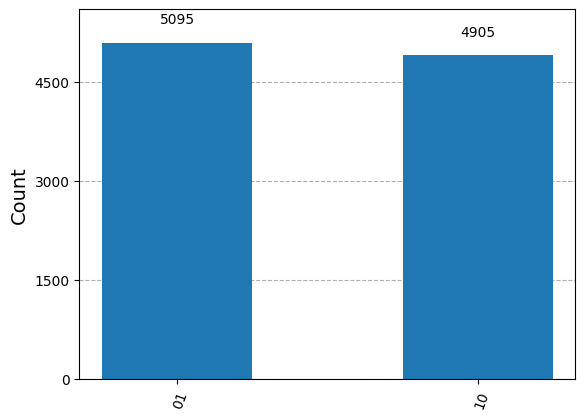

In [ ]:
plot_histogram(counts_sampler)

The histogram shows an approximately even probability of finding our qubits in the `01` and the `10` states, suggesting that entanglement was performed as expected.

<a id="exercise3"></a>
<a name="exercise3"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 3: Create and draw a W-state circuit</b>
    
Next, we will develop a slightly more complicated circuit. Similarly to Bell states circuit producing Bell states, W-state circuits produce W states. Although Bell states entangle two qubits, W-states entangle three qubits.
To build our W-state, we will follow 6 simple steps:

1.  Initialize our 3 qubit circuit
2.  Perform an Ry rotation on our qubit. The specifics of this operation are provided.
3.  Perform a controlled hadamard gate on qubit 1, with control qubit 0
4.  Add a CNOT gate with control qubit 1 and target qubit 2
5.  Add a CNOT gate with control qubit 0 and target qubit 1
6.  Add a X gate on qubit 0

**Your Task:** Follow the steps to build the W-state circuit
    
</div>

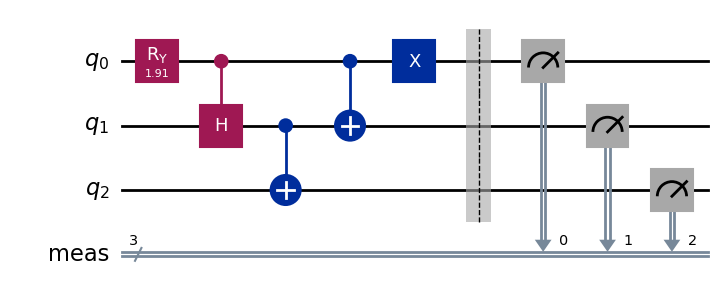

In [ ]:
# Step 1
qc = QuantumCircuit(3)

# Step 2 (provided)
qc.ry(1.91063324, 0)

# Add steps 3-6 below
qc.ch(0,1)
qc.cx(1,2)
qc.cx(0,1)
qc.x(0)

### Don't change any code past this line ###
qc.measure_all()
qc.draw('mpl')

Once again, let's visualize our results:

In [ ]:
sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'100': 3231, '001': 3391, '010': 3378}


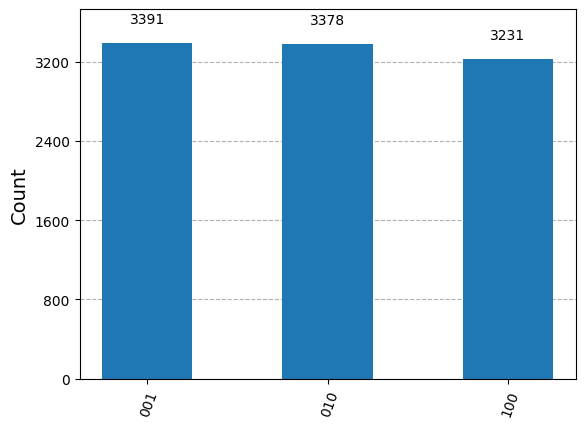

In [ ]:
plot_histogram(counts_sampler)

We observe our total counts distributed in three similarly sized bins in three states, which are the three desired states for the successful creation of a W-state. Good work!

Now that we have basic circuits down, we'll start introducing and developing more complex codes with Qiskit 1.0.

## 2. VQE with Qiskit 1.0
<a name="pt2"></a>

Our main goal here is to leverage Qiskit Runtime to run a Variational Quantum Eigensolver (VQE). We will be using the Qiskit Runtime Estimator to calculate expectation values for combinations of qubits, and Qiskit Runtime Sessions to facilitate running a VQE algorithm. This draws upon code from an example that experimental physicist & IBM Quantum researcher Nick Bronn created for the [Coding with Qiskit Runtime video series](https://www.youtube.com/playlist?list=PLOFEBzvs-VvqAC8DnVoLOzg2bKE4C7ARM), specifically in [Episode 05 Primitives & Sessions](https://youtu.be/yxuH8eb4MS4?si=e3trSORNjooWlQXu), and implements it using the newest Qiskit 1.0 version.

### Let's start by creating a Pauli operator
A Pauli operator is a matrix representing a quantum mechanical observable corresponding to a measurement of spin along a particular axis (x, y, z). Let's build one:

In [ ]:
pauli_op = SparsePauliOp(['ZII', 'IZI', 'IIZ'])
print(pauli_op.to_matrix())

[[ 3.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -3.+0.j]]


Feel free to experiment with various Pauli operators and see what resulting possible combinantions you obtain!

### Setup and run a VQE algorithm

Now, we'll start setting up our VQE algorithm. Variational quantum eigensolvers (VQEs), are hybrid algorithms that utilize quantum and classical techniques to find the ground state of a given physical system. They are often used in quantum chemistry and optimization problems, and are promising candidates for hybrid-algorithms in noisy near-term devices.

VQEs are characterized by the use of a classical optimization algorithm to iteratively improve upon a parameterized trial solution, called an "ansatz". The aim is to solve for the ground state of a given Hamiltonian represented as a linear combination of Pauli terms.

Executing a VQE algorithm requires these three steps:

1. Setting up the Hamiltonian and ansatz (problem specification)
2. Implementing the Qiskit Runtime estimator
3. Adding the Classical optimizer and running our program

We we will follow these steps.

<a id="exercise4"></a>
<a name="exercise4"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 4: Create a parameterized circuit to serve as the ansatz</b>
    
Our first task will be to set up our ansatz, or a trial solution, for our problem which we will compare against.

For this we can use Qiskit's `TwoLocal` circuit, a pre-built circuit that can be used to prepare trial wave functions for variational quantum algorithms or classification circuits for machine learning. TwoLocal circuits are parameterized circuits consisting of alternating rotation layers and entanglement layers. You can find more information about them in [Qiskit's documentation](https://docs.quantum.ibm.com/api/qiskit/circuit_library).

**Your Task:** Set up a 3-qubit TwoLocal circuit using [Ry](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.RYGate) and [Rz](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.RZGate) rotations. Entanglement should be set to full, and entanglement blocks should use the Cz gate. Make sure you set `reps=1` and `insert_barriers=True`.

</div>

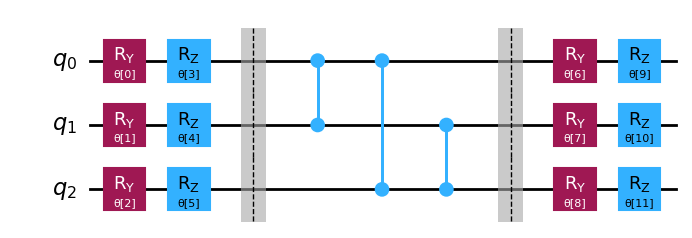

In [ ]:
num_qubits = 3
rotation_blocks = ['ry','rz']
entanglement_blocks = 'cz'
entanglement = 'full'

ansatz = TwoLocal(num_qubits, rotation_blocks, entanglement_blocks, entanglement, reps=1, insert_barriers=True)


### Don't change any code past this line ###
ansatz.decompose().draw('mpl')

From the previous figure we see that our ansatz circuit is defined by a vector of parameters θ, with the total number given by:

In [ ]:
num_params = ansatz.num_parameters
num_params

12

<a id="exercise5"></a>
<a name="exercise5"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 5: Transpile to ISA circuits </b>
    
In this example we will use the [FakeSherbrooke](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.fake_provider.FakeSherbrooke), a fake  (simulated) 127-qubit backend, useful for testing the transpiler and other backend-facing functionalities.

Preset pass managers are the default pass managers used by the `transpile()` function. `transpile()` provides a convenient and simple method to construct a standalone `PassManager` object that mirrors what the transpile function does when optimizing and transforming a quantum circuit for execution on a specific backend.

**Your Task:** Define the pass manager. Reference the [Qiskit documentation](https://docs.quantum.ibm.com/api/qiskit/0.42/qiskit.transpiler.preset_passmanagers.generate_preset_pass_manager) for more info.


</div>

In [ ]:
backend_answer = FakeSherbrooke()
optimization_level_answer = 2
pm = generate_preset_pass_manager(backend=backend_answer,optimization_level=optimization_level_answer)
isa_circuit = pm.run(ansatz)

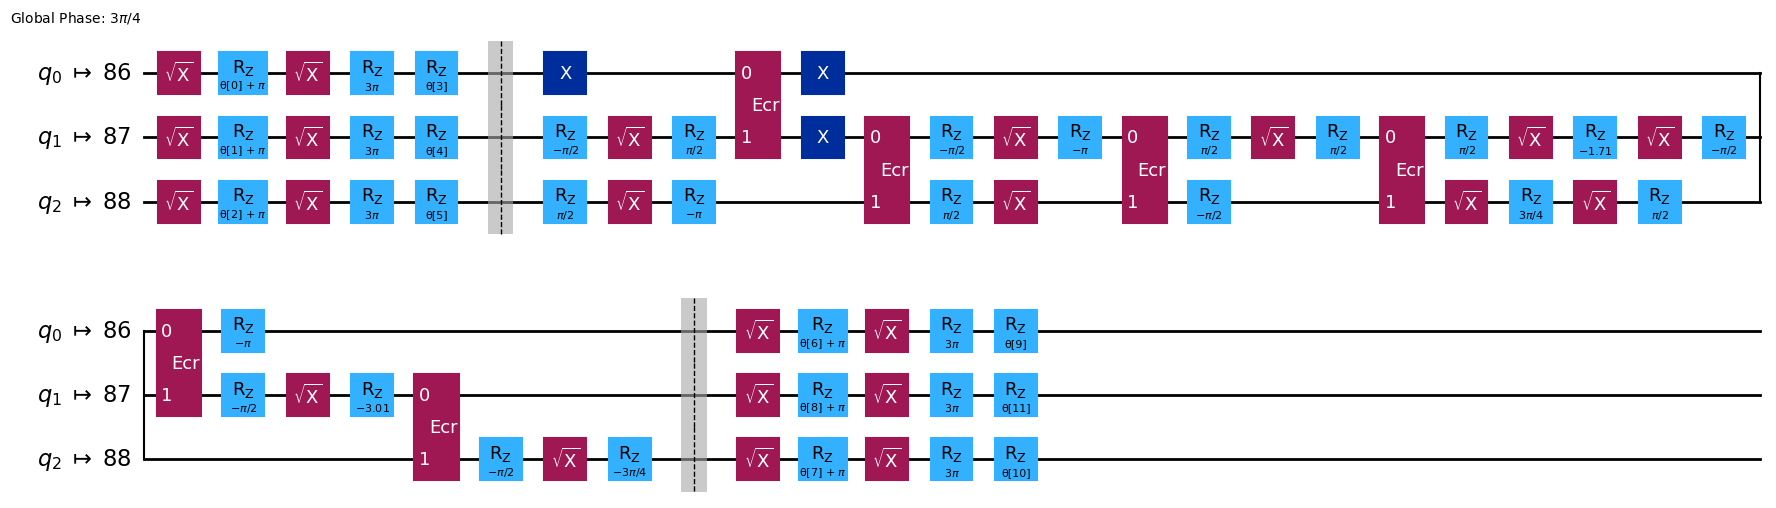

In [ ]:
isa_circuit.draw('mpl', idle_wires=False,)

As you can see, after transpilation, the circuit only contain the native basis gates of the backend. For more details on ISA circuits check out these resources from the IBM team:

- [What are ISA circuits?](https://www.ibm.com/quantum/blog/isa-circuits)
- [Understanding the new ISA circuits requirement](https://docs.quantum.ibm.com/announcements/news/2024-05-06-ISA-circuit-requirement#understanding-the-new-isa-circuits-requirement)

You can run the next cell to define our Hamiltonian, then move on to Exercise 6.

In [ ]:
# Define our Hamiltonian
hamiltonian_isa = pauli_op.apply_layout(layout=isa_circuit.layout)

<div class="alert alert-block alert-info">
    
<b>Tip: For the following two exercises make sure you are working with Qiskit 1.0.2! </b>

You can download this version using: **%pip install qiskit==1.0.2**

    
</div>

<a id="exercise6"></a>
<a name="exercise6"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 6: Defining the cost function </b>
    
Like many classical optimization problems, the solution to a VQE problem can be formulated as minimization of a scalar cost function. The cost function for our VQE is simple: the energy!

**Your Task:** Define a cost function by using Qiskit Runtime Estimator to find the energy for a given parameterized state and our Hamiltonian.

</div>

In [ ]:
def cost_func(params, ansatz, hamiltonian, estimator, callback_dict):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    pub = (ansatz, [hamiltonian], [params])
    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs[0]

    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = params
    callback_dict["cost_history"].append(energy)


### Don't change any code past this line ###
    print(energy)
    return energy, result

Callback functions are a standard way for users to obtain additional information about the status of an iterative algorithm (such as VQE). However, it is possible to do much more than this. Here, we use a mutable object (dictionary), to store resulting vector at each iteration of our algorithm, in case we need to restart the routine due to failure or return the another iteration number.

In [ ]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

### Using the Classical Optimizer

We can now use a classical optimizer of our choice to minimize the cost function.
In real quantum hardware, the choice of optimizer is important, as not all optimizers handle noisy cost function landscapes equally well. Here, we can use SciPy routines.

To begin the routine, we specify a random initial set of parameters:

In [ ]:
x0 = 2 * np.pi * np.random.random(num_params)
x0

array([0.54032967, 5.13071382, 1.10188704, 2.05350282, 2.43377408,
       2.84488295, 4.43127812, 0.35294804, 1.81184993, 3.64248898,
       0.83402228, 0.13553799])

<a id="exercise7"></a>
<a name="exercise7"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 7: QiskitRuntimeService V2 Primitives, local testing mode and Sessions, a first look </b>
    

Next, we will use the new QiskitRuntimeService [V2 primitives](https://docs.quantum.ibm.com/api/migration-guides/v2-primitives): [EstimatorV2](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.EstimatorV2) and [SamplerV2](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.SamplerV2).

The new Estimator interface lets you specify a single circuit and multiple observables and parameter value sets for that circuit, so that sweeps over parameter value sets and observables can be efficiently specified. Previously, you had to specify the same circuit multiple times to match the size of the data to be combined. Also, while you can still use optimization_level and resilience_level as the simple knobs, V2 primitives give you the flexibility to turn on or off individual error mitigation / suppression methods to customize them for your needs.

SamplerV2 is simplified to focus on its core task of sampling the quantum register from the execution of quantum circuits. It returns the samples, whose type is defined by the program, without weights. The output data is also separated by the output register names defined by the program. This change enables future support for circuits with classical control flow.

We will also use Qiskit's 1.0 [local testing mode](https://docs.quantum.ibm.com/verify/local-testing-mode). Local testing mode (available with qiskit-ibm-runtime 0.22.0 or later) can be used to help develop and test programs before fine-tuning them and sending them to real quantum hardware.

**Your Task:** After using local testing mode to verify your program, all you need to do is change the backend name to run it on an IBM Quantum system.

</div>

In [ ]:
### Select a Backend
## Use FakeSherbrooke to simulate with noise that matches closer to the real experiment. This will run slower.
## Use AerSimulator to simulate without noise to quickly iterate. This will run faster.

backend = FakeSherbrooke()
# backend = AerSimulator()

# ### Don't change any code past this line ###

# Here we have updated the cost function to return only the energy to be compatible with recent scipy versions (>=1.10)
def cost_func_2(*args, **kwargs):
    energy, result = cost_func(*args, **kwargs)
    return energy

with Session(backend=backend) as session:
    estimator = Estimator(session=session)

    res = minimize(
        cost_func_2,
        x0,
        args=(isa_circuit, hamiltonian_isa, estimator, callback_dict),
        method="cobyla",
        options={'maxiter': 30})

<ipython-input-35-1bf76817a354>:16: DeprecationWarning: The 'session' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  estimator = Estimator(session=session)


0.123046875
0.171875
1.09130859375
0.64453125
0.091796875
0.0771484375
0.0341796875
0.90576171875
-0.453125
-0.82080078125
-0.89013671875
-0.8447265625
-0.919921875
-1.81640625
-2.32861328125
-1.11865234375
-2.5263671875
-2.01806640625
-2.5087890625
-2.7607421875
-2.57421875
-2.560546875
-2.60400390625
-2.69140625
-2.74755859375
-2.76025390625
-2.68408203125
-2.75537109375
-2.640625
-2.6630859375


<div class="alert alert-block alert-info">
    
<b>Tip: Increase `maxiter` if you do not see convergence </b>

If the cost is not converging, increase the `maxiter` (100 is an appropriate number) and run Ex 7 again.
    
</div>

Let's look at our results:

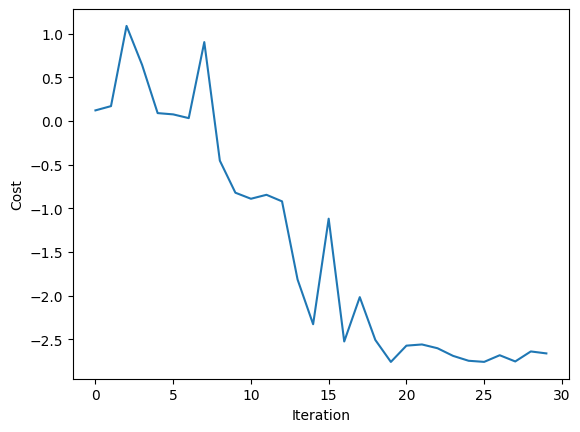

In [ ]:
fig, ax = plt.subplots()
plt.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.draw()

🎉 As expected our VQE algorithm minimized our energy across iterations, until reaching the ground state. We have now successfully implemented a VQE algorithm using brand-new Qiskit 1.0 functionalities!

Thank you for completing this lab, and good luck on your quantum journey!

# Additional information

**Created by:** James Weaver, Maria Gragera Garces

**Advised by:** Junye Huang

**Version:** 1.3.0

**Adjusted by** Zina Efchary for FH Vorarlberg Session